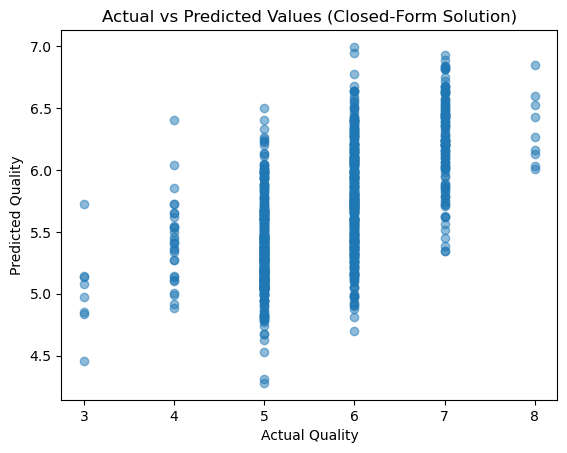

RMSE (Train) - Closed-Form: 0.6463
RMSE (Test) - Closed-Form: 0.6219
RMSE (Train) - LMS: 0.7544
RMSE (Test) - LMS: 0.7692


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv('winequality-red.csv', sep = ";")

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)

X_train = train_data.drop(columns=['quality']).values
y_train = train_data['quality'].values

X_val = val_data.drop(columns=['quality']).values
y_val = val_data['quality'].values

X_test = test_data.drop(columns=['quality']).values
y_test = test_data['quality'].values

X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]

w_closed = np.linalg.inv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ y_train

y_train_pred = X_train_bias @ w_closed
y_test_pred = X_test_bias @ w_closed

plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Values (Closed-Form Solution)')
plt.show()

rmse_train_closed = np.sqrt(np.mean((y_train - y_train_pred) ** 2))
rmse_test_closed = np.sqrt(np.mean((y_test - y_test_pred) ** 2))

print(f'RMSE (Train) - Closed-Form: {rmse_train_closed:.4f}')
print(f'RMSE (Test) - Closed-Form: {rmse_test_closed:.4f}')

np.random.seed(42)
w_lms = np.random.randn(X_train_bias.shape[1]) 
eta = 0.0001
epochs = 100

# Train LMS model
for epoch in range(epochs):
    for i in range(X_train.shape[0]):
        x_i = X_train_bias[i]
        y_i = y_train[i]
        error = y_i - np.dot(w_lms, x_i)
        w_lms += eta * error * x_i

y_train_pred_lms = X_train_bias @ w_lms
y_test_pred_lms = X_test_bias @ w_lms

rmse_train_lms = np.sqrt(np.mean((y_train - y_train_pred_lms) ** 2))
rmse_test_lms = np.sqrt(np.mean((y_test - y_test_pred_lms) ** 2))

print(f'RMSE (Train) - LMS: {rmse_train_lms:.4f}')
print(f'RMSE (Test) - LMS: {rmse_test_lms:.4f}')
